# Cell Cycle Data

Import the cell cycle dataset excel spreadsheet (using Pandas). You may need to do some tidying of the data such as dropping rows with missing NaN values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns

df = pd.read_excel('Cell-Cycle-Set.xlsx')
# curate to drop columns with missing values
df.dropna(inplace=True)

# Week 1

## Task 1

Generate a histogram of one of the cell cycle stages of the RNA and protein distribution. Do you notice anything interesting with regards to the mean/variance of the distribution?

Text(0.5, 0, 'Mean G1 Expression')

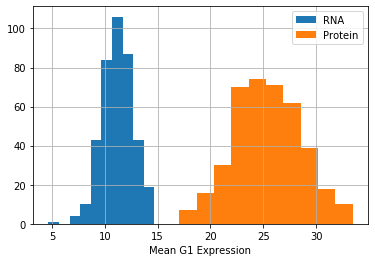

In [2]:
#copying data to different set in order to perform changes specific for this task
t1_df = df

#clearing out rows with NaNs in the to be used columns, 
t1_df.replace("", float("NaN"), inplace=True)
t1_df.dropna(subset = ["mean_RNA_G1"], inplace=True)
t1_df.dropna(subset = ["mean_protein_G1"], inplace=True)

#showing the histogram
fig1, ax1 = plt.subplots()
t1_df.mean_RNA_G1.hist(ax=ax1, label='RNA')
t1_df.mean_protein_G1.hist(ax=ax1, label='Protein')
ax1.legend()
ax1.set_xlabel('Mean G1 Expression')

## Task 2

Look at the pairwise correlations between each of the RNA/protein columns (this can be achieved using the corr() function). Does the change in timestep have much effect on the relationship(s) between RNA and protein?

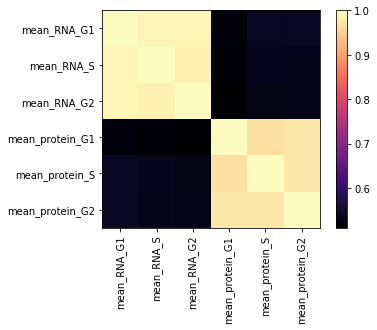

In [3]:
t2_df = df

#clearing out rows with NaNs in the to be used columns, 
t2_df.replace("", float("NaN"), inplace=True)
t2_df.dropna(subset = ["mean_RNA_G1","mean_RNA_G2", "mean_RNA_S", 
                       "mean_protein_G1", "mean_protein_G2", "mean_protein_S"], inplace=True)

fig3,ax3 = plt.subplots()
cax = ax3.imshow(df.corr(), cmap='magma')
ax3.set_xticklabels(df.columns, rotation=90)
ax3.set_yticklabels(df.columns)
fig3.colorbar(cax)

## Task 3 

Generate a scatterplot of the RNA versus. protein for each cell cycle stage. Fit a linear model to the data, can we infer protein concentration from RNA concentration?

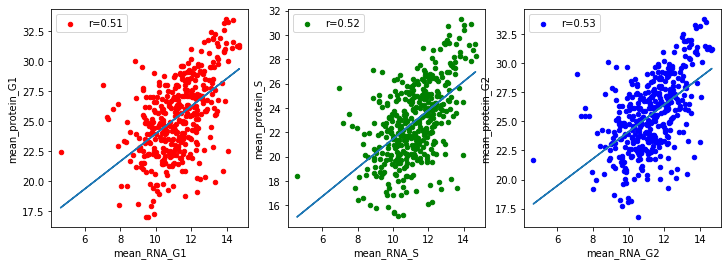

In [4]:
from numpy.polynomial.polynomial import polyfit

t3_df = df

#clearing out rows with NaNs in the to be used columns, 
t3_df.replace("", float("NaN"), inplace=True)
t3_df.dropna(subset = ["mean_RNA_G1","mean_RNA_G2", "mean_RNA_S", 
                       "mean_protein_G1", "mean_protein_G2", "mean_protein_S"], inplace=True)



fig2, ax2 = plt.subplots(ncols=3, figsize=(12,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax2[0], color='r', label='r={:0.2f}'.format(
            spearmanr(t3_df.mean_RNA_G1.values, t3_df.mean_protein_G1.values)[0]
        ))
x0 = t3_df['mean_RNA_G1']
b0,m0 = polyfit(t3_df['mean_RNA_G1'],t3_df['mean_protein_G1'],1)
ax2[0].plot(x0, b0 + m0 * x0, '-')

df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax2[1], color='g', label='r={:0.2f}'.format(
            spearmanr(t3_df.mean_RNA_S.values, t3_df.mean_protein_S.values)[0]
        ))
x1 = t3_df['mean_RNA_S']
b1, m1 = polyfit(t3_df['mean_RNA_S'],t3_df['mean_protein_S'],1)
ax2[1].plot(x1, b1 + m1 * x1, '-')


df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax2[2], color='b', label='r={:0.2f}'.format(
            spearmanr(t3_df.mean_RNA_G2.values, t3_df.mean_protein_G2.values)[0]
        ))
x2 = t3_df['mean_RNA_G2']
b2, m2 = polyfit(t3_df['mean_RNA_G2'],t3_df['mean_protein_G2'],1)
ax2[2].plot(x2, b2 + m2 * x2, '-')


# Week 2

## Task 1

Find all genes that contain 'cell cycle' in their GOBP term and plot them as a scatterplot (with different colour) overlaid across all genes for each cell cycle phase. Is there a stronger/weaker correlation?

71


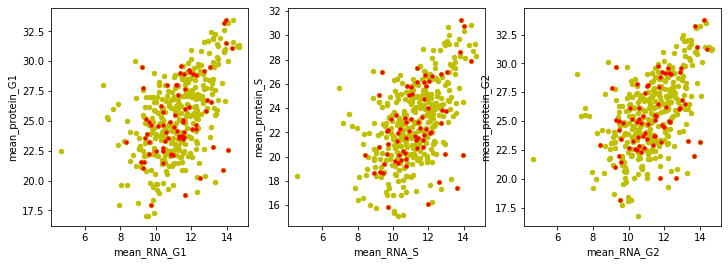

In [5]:
gobp = df[df.GOBP.str.contains('cell cycle')]
fig4,ax4 = plt.subplots(ncols=3, figsize=(12,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax4[0], color='y')
ax4[0].scatter(gobp.mean_RNA_G1, gobp.mean_protein_G1, color='r', s=10.)
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax4[1], color='y')
ax4[1].scatter(gobp.mean_RNA_S, gobp.mean_protein_S, color='r', s=10.)
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax4[2], color='y')
ax4[2].scatter(gobp.mean_RNA_G2, gobp.mean_protein_G2, color='r', s=10.)
print(len(gobp))

C:\Users\thwal\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\thwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


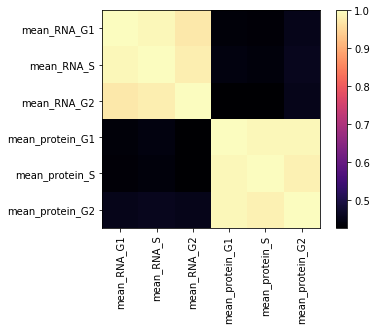

In [6]:
#clearing out rows with NaNs in the to be used columns, 
gobp.replace("", float("NaN"), inplace=True)
gobp.dropna(subset = ["mean_RNA_G1","mean_RNA_G2", "mean_RNA_S", 
                       "mean_protein_G1", "mean_protein_G2", "mean_protein_S"], inplace=True)

fig4_1,ax4_1 = plt.subplots()
cax = ax4_1.imshow(gobp.corr(), cmap='magma')
ax4_1.set_xticklabels(gobp.columns, rotation=90)
ax4_1.set_yticklabels(gobp.columns)
fig4_1.colorbar(cax)

## Task 2

71


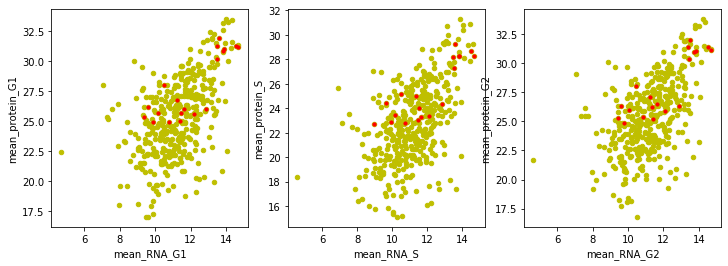

In [7]:
gocc = df[df.GOCC.str.contains('ribosome')]
fig5,ax5 = plt.subplots(ncols=3, figsize=(12,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax5[0], color='y')
ax5[0].scatter(gocc.mean_RNA_G1, gocc.mean_protein_G1, color='r', s=10.)
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax5[1], color='y')
ax5[1].scatter(gocc.mean_RNA_S, gocc.mean_protein_S, color='r', s=10.)
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax5[2], color='y')
ax5[2].scatter(gocc.mean_RNA_G2, gocc.mean_protein_G2, color='r', s=10.)
print(len(gobp))

C:\Users\thwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


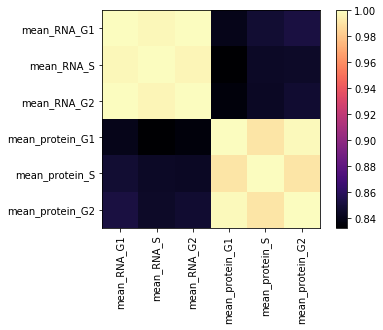

In [8]:
#clearing out rows with NaNs in the to be used columns, 
gocc.replace("", float("NaN"), inplace=True)
gocc.dropna(subset = ["mean_RNA_G1","mean_RNA_G2", "mean_RNA_S", 
                       "mean_protein_G1", "mean_protein_G2", "mean_protein_S"], inplace=True)

fig5_1,ax5_1 = plt.subplots()
cax = ax5_1.imshow(gocc.corr(), cmap='magma')
ax5_1.set_xticklabels(gocc.columns, rotation=90)
ax5_1.set_yticklabels(gocc.columns)
fig5_1.colorbar(cax)

## Task 3

Count the number of occurrences of every GOBP term across all genes, what are some of the difficulties that arise when using these terms?

In [9]:
print(df.GOBP.str.split(';',expand=True).stack().value_counts())

cellular process                                                377
metabolic process                                               273
cellular metabolic process                                      260
primary metabolic process                                       255
biological regulation                                           236
                                                               ... 
tube closure                                                      1
regulation of mitochondrial membrane potential                    1
regulation of systemic arterial blood pressure by endothelin      1
CRD-mediated mRNA stabilization                                   1
endothelial cell chemotaxis                                       1
Length: 2854, dtype: int64


## Task 4

Calculate the change in mRNA/protein level across the cell cycle by taking the difference at each stage (G1-S, S-G2, G2-G1), and standardize the differences by mean-centering and variance scaling. Repeat tasks 1 and 2 by plotting the changes in levels with GOBP/GOCC labelling. What do we notice about changes in the cell cycle? Is there any apparent clustering of GO terms?

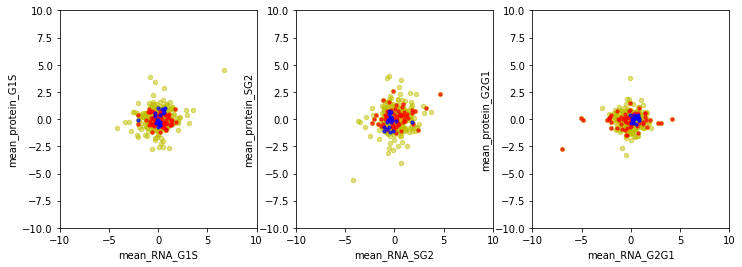

In [10]:
df['mean_RNA_G1S'] = (df.mean_RNA_S - df.mean_RNA_G1)
df['mean_RNA_SG2'] = (df.mean_RNA_G2 - df.mean_RNA_S)
df['mean_RNA_G2G1'] = (df.mean_RNA_G1 - df.mean_RNA_G2)
df['mean_protein_G1S'] = (df.mean_protein_S - df.mean_protein_G1)
df['mean_protein_SG2'] = (df.mean_protein_G2 - df.mean_protein_S)
df['mean_protein_G2G1'] = (df.mean_protein_G1 - df.mean_protein_G2)

# standardise
df.iloc[:,-6:] = (df.iloc[:,-6:] - df.iloc[:,-6:].mean(axis=0)) / df.iloc[:,-6:].std(axis=0)

gobp = df[df.GOBP.str.contains('cell cycle')]
gocc = df[df.GOCC.str.contains('ribosome')]
fig6,ax6 = plt.subplots(ncols=3, figsize=(12,4))

for ax in ax6:
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])

df.plot.scatter('mean_RNA_G1S', 'mean_protein_G1S', ax=ax6[0], color='y', alpha=.5)
df.plot.scatter('mean_RNA_SG2', 'mean_protein_SG2', ax=ax6[1], color='y',alpha=.5)
df.plot.scatter('mean_RNA_G2G1', 'mean_protein_G2G1', ax=ax6[2], color='y', alpha=.5)
ax6[0].scatter(gobp.mean_RNA_G1S, gobp.mean_protein_G1S, color='r', s=10., alpha=.7)
ax6[1].scatter(gobp.mean_RNA_SG2, gobp.mean_protein_SG2, color='r', s=10., alpha=.7)
ax6[2].scatter(gobp.mean_RNA_G2G1, gobp.mean_protein_G2G1, color='r', s=10., alpha=.7)
ax6[0].scatter(gocc.mean_RNA_G1S, gocc.mean_protein_G1S, color='b', s=10., alpha=.7)
ax6[1].scatter(gocc.mean_RNA_SG2, gocc.mean_protein_SG2, color='b', s=10., alpha=.7)
ax6[2].scatter(gocc.mean_RNA_G2G1, gocc.mean_protein_G2G1, color='b', s=10., alpha=.7)